# ***1. INSTALLING PACKAGES***

In [ ]:
!pip install pycaret -q

     |████████████████████████████████| 301 kB 5.0 MB/s 
     |████████████████████████████████| 1.3 MB 66.4 MB/s 
     |████████████████████████████████| 2.0 MB 44.8 MB/s 
     |████████████████████████████████| 167 kB 51.0 MB/s 
     |████████████████████████████████| 15.5 MB 19.7 MB/s 
     |████████████████████████████████| 114 kB 69.4 MB/s 
     |████████████████████████████████| 1.7 MB 53.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 54.8 MB/s 
     |████████████████████████████████| 261 kB 60.0 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 102 kB 10.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 3.1 MB 40.8 MB/s 
     |███████████████████

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
!pip install pandas-profiling==2.8.0  -q

     |████████████████████████████████| 259 kB 5.1 MB/s 
     |████████████████████████████████| 59 kB 6.1 MB/s 


In [ ]:
import pycaret
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ***2. DATA COLLECTION***

**Data description**

Restaurent revenue prediction dataset contains 137 restaurants in the training set, and a test set of 100000 restaurants. The data columns include the open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. 

**Data fields**

Id : Restaurant id. 

Open Date : opening date for a restaurant

City : City that the restaurant is in. Note that there are unicode in the names. 

City Group: Type of the city. Big cities, or Other.

Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile

P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

In [ ]:
dataset=pd.read_csv("/content/train.csv")
dataset

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


# ***3. EXPLORATORY DATA ANALYSIS(EDA)*** 

In [ ]:
dataset[["day", "month", "year"]] = dataset["Open Date"].str.split("/", expand = True)
print("\nNew DataFrame:")
print(dataset)


New DataFrame:
      Id   Open Date        City  City Group  ...    revenue  day  month  year
0      0  07/17/1999    İstanbul  Big Cities  ...  5653753.0   07     17  1999
1      1  02/14/2008      Ankara  Big Cities  ...  6923131.0   02     14  2008
2      2  03/09/2013  Diyarbakır       Other  ...  2055379.0   03     09  2013
3      3  02/02/2012       Tokat       Other  ...  2675511.0   02     02  2012
4      4  05/09/2009   Gaziantep       Other  ...  4316715.0   05     09  2009
..   ...         ...         ...         ...  ...        ...  ...    ...   ...
132  132  06/25/2008     Trabzon       Other  ...  5787594.0   06     25  2008
133  133  10/12/2006       İzmir  Big Cities  ...  9262754.0   10     12  2006
134  134  07/08/2006     Kayseri       Other  ...  2544857.0   07     08  2006
135  135  10/29/2010    İstanbul  Big Cities  ...  7217634.0   10     29  2010
136  136  09/01/2009    İstanbul  Big Cities  ...  6363241.0   09     01  2009

[137 rows x 46 columns]


In [ ]:
dataset.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,day,month,year
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,07,17,1999
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,02,14,2008
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,03,09,2013
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,02,02,2012
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,05,09,2009


In [ ]:
counts = dataset['City'].value_counts() #counts unique values
percent = ((dataset['City'].value_counts()/dataset['City'].value_counts().sum())*100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts,'percentage':percent}).head(5)

,count,percentage
İstanbul,50,36.5%
Ankara,19,13.9%
İzmir,9,6.6%
Bursa,5,3.6%
Samsun,5,3.6%


In [ ]:
pandas_profiling.ProfileReport(dataset,minimal=True)

Summarize dataset:   0%|          | 0/52 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# ***4. DATA PRE-PROCESSING***

In [ ]:
dataset.drop_duplicates(keep="first",inplace=True,ignore_index=True)

In [ ]:
dataset.shape#Duplicate rows removed

(137, 46)

In [ ]:
data=dataset.dropna(subset=['revenue'],axis=0,how='any')#checks for missing in target column

In [ ]:
data.reset_index(drop=True)#resetting index of data variable

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,day,month,year
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,07,17,1999
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,02,14,2008
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,03,09,2013
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,02,02,2012
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,05,09,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,06,25,2008
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,12,2006
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,07,08,2006
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,29,2010


In [ ]:
from pycaret.regression import *

In [ ]:
exp_reg = setup(data = dataset, target = 'revenue', session_id=123, 
                ignore_features=["P14","P15","P16","P17",	"P18",	"P19",	"P20",	"P21",	"P22",	"P23",	"P24",	"P25", "P26",	"P27",	"P28",	"P30",	"P31",	"P32",	"P33",	"P34",	"P35",	"P36",	"P37"],
                normalize=True,transformation=True,
                          remove_multicollinearity=True,
                          remove_outliers=True,combine_rare_levels=True,   
                          feature_selection=True,ignore_low_variance=True)

,Description,Value
0,session_id,123
1,Target,revenue
2,Original Data,"(137, 46)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,14
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(90, 102)"


In [ ]:
get_config("X")

,P3,Open Date_month_1,P1_9,P11_6,P8_10,P13,Open Date_is_month_start_1,City_Bursa,Open Date_month_3,P5_1,P1_others_infrequent,City_Samsun,City_Trabzon,P11_1,P5_3,P5_4,P11_2,City_Konya,P5_2,P11_5,City_Diyarbakır,City_Adana,Open Date_weekday_4,City_others_infrequent,P1_4,P7_others_infrequent,P11_3,Open Date_weekday_1,P10_4,P7_5,Open Date_month_7,P12_10,P7_1,P7_4,Open Date_month_9,P1_2,City_Tekirdağ,P8_others_infrequent,P9_8,P6_4,...,Open Date_month_4,P11_8,P7_10,P9_4,P10_5,Open Date_month_11,P4,P6_5,Open Date_weekday_3,P1_3,P1_1,Open Date_month_2,P6_others_infrequent,P8_8,Open Date_weekday_2,Open Date_month_12,Open Date_is_month_end_0,Open Date_weekday_0,P12_2,P6_2,City Group_Other,Open Date_month_6,P11_4,P12_3,Type_IL,Open Date_weekday_5,City_İzmir,P8_3,Open Date_month_5,Open Date_month_10,City_İstanbul,P6_6,P6_3,City_Ankara,P12_4,City_Muğla,Open Date_weekday_6,P2,P8_5,P6_1
0,-0.246407,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.237743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.470751,0.0,0.0
1,-0.246407,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.237743,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.470751,1.0,0.0
2,-2.248934,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.768909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.207271,1.0,0.0
3,1.647674,0.0,0.0,0.0,0.0,1.923093,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.533913,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134706,0.0,0.0
4,-1.237621,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.237743,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.207271,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,-1.237621,0.0,0.0,0.0,0.0,-1.279645,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.768909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.907008,0.0,0.0
133,-0.246407,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,-0.237743,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.470751,0.0,0.0
134,-0.246407,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.237743,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.207271,1.0,

In [ ]:
get_config("y")

0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
132    5787594.0
133    9262754.0
134    2544857.0
135    7217634.0
136    6363241.0
Name: revenue, Length: 137, dtype: float32

In [ ]:
get_config("X_train")

,P3,Open Date_month_1,P1_9,P11_6,P8_10,P13,Open Date_is_month_start_1,City_Bursa,Open Date_month_3,P5_1,P1_others_infrequent,City_Samsun,City_Trabzon,P11_1,P5_3,P5_4,P11_2,City_Konya,P5_2,P11_5,City_Diyarbakır,City_Adana,Open Date_weekday_4,City_others_infrequent,P1_4,P7_others_infrequent,P11_3,Open Date_weekday_1,P10_4,P7_5,Open Date_month_7,P12_10,P7_1,P7_4,Open Date_month_9,P1_2,City_Tekirdağ,P8_others_infrequent,P9_8,P6_4,...,Open Date_month_4,P11_8,P7_10,P9_4,P10_5,Open Date_month_11,P4,P6_5,Open Date_weekday_3,P1_3,P1_1,Open Date_month_2,P6_others_infrequent,P8_8,Open Date_weekday_2,Open Date_month_12,Open Date_is_month_end_0,Open Date_weekday_0,P12_2,P6_2,City Group_Other,Open Date_month_6,P11_4,P12_3,Type_IL,Open Date_weekday_5,City_İzmir,P8_3,Open Date_month_5,Open Date_month_10,City_İstanbul,P6_6,P6_3,City_Ankara,P12_4,City_Muğla,Open Date_weekday_6,P2,P8_5,P6_1
82,-0.246407,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.608043,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.621848,0.0,1.0
127,-0.246407,0.0,0.0,0.0,0.0,0.106838,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.237743,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.207271,1.0,0.0
108,0.713259,0.0,0.0,0.0,0.0,-3.124543,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.237743,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.621848,1.0,0.0
105,0.713259,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.608043,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.621848,1.0,0.0
104,-0.246407,1.0,0.0,0.0,0.0,0.106838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.608043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.470751,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,-0.246407,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.768909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.207271,0.0,0.0
98,-0.246407,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,-0.237743,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.207271,0.0,0.0
66,-0.246407,1.0,0.0,0.0,0.0,0.106838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.608043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.6

In [ ]:
get_config("y_train")

82     3807496.0
127    7592272.0
108    3570392.0
105    2792031.0
104    4467728.0
         ...    
17     8213524.0
98     2344689.0
66     1882131.0
126    4015749.0
109    4219263.0
Name: revenue, Length: 90, dtype: float32

In [ ]:
get_config("X_test")

,P3,Open Date_month_1,P1_9,P11_6,P8_10,P13,Open Date_is_month_start_1,City_Bursa,Open Date_month_3,P5_1,P1_others_infrequent,City_Samsun,City_Trabzon,P11_1,P5_3,P5_4,P11_2,City_Konya,P5_2,P11_5,City_Diyarbakır,City_Adana,Open Date_weekday_4,City_others_infrequent,P1_4,P7_others_infrequent,P11_3,Open Date_weekday_1,P10_4,P7_5,Open Date_month_7,P12_10,P7_1,P7_4,Open Date_month_9,P1_2,City_Tekirdağ,P8_others_infrequent,P9_8,P6_4,...,Open Date_month_4,P11_8,P7_10,P9_4,P10_5,Open Date_month_11,P4,P6_5,Open Date_weekday_3,P1_3,P1_1,Open Date_month_2,P6_others_infrequent,P8_8,Open Date_weekday_2,Open Date_month_12,Open Date_is_month_end_0,Open Date_weekday_0,P12_2,P6_2,City Group_Other,Open Date_month_6,P11_4,P12_3,Type_IL,Open Date_weekday_5,City_İzmir,P8_3,Open Date_month_5,Open Date_month_10,City_İstanbul,P6_6,P6_3,City_Ankara,P12_4,City_Muğla,Open Date_weekday_6,P2,P8_5,P6_1
99,-0.246407,0.0,0.0,0.0,0.0,-1.279645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.237743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.470751,0.0,0.0
89,-0.246407,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.608043,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.347912,1.0,0.0
102,-2.248934,0.0,0.0,0.0,0.0,-1.279645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.768909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.470751,0.0,0.0
107,-0.246407,0.0,0.0,0.0,0.0,0.106838,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.237743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.207271,0.0,0.0
4,-1.237621,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.237743,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.207271,1.0,0.0
121,-0.246407,0.0,0.0,0.0,0.0,-1.279645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.237743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.207271,1.0,0.0
87,-0.246407,0.0,0.0,0.0,0.0,-1.279645,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.237743,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.470751,1.0,0.0
101,0.713259,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.237743,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.207271,0.0,0.0
114,0.713259,0.0,0.0,0.0,0.0,0.106838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.237743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
get_config("y_test")

99     13575224.0
89      2364478.0
102     2738052.0
107     3248660.0
4       4316715.0
121     3445076.0
87      5906596.0
101     4758476.0
114     4155435.0
0       5653753.0
31      2058644.0
37      2740687.0
28      4705945.0
128     2383840.0
45      3752885.0
29      3447890.0
24      8904084.0
8       4952497.0
5       5017319.0
16     19696940.0
13      4807746.0
112     3784230.0
59      3600467.0
120     4067566.0
20      5525735.0
91      2083447.0
103     4429512.0
35      3903884.0
60      3164972.0
33      2371202.0
88      2025297.0
118     1847826.0
62      5286212.0
38      5461700.0
19      2021934.0
122     4286645.0
23      2999068.0
9       5444227.0
74      5500818.0
115     4882985.0
42      4952255.0
72      2525375.0
Name: revenue, dtype: float32

In [ ]:
temp_X_train=get_config("X_train")
temp_y_train=get_config("y_train")

# ***5.  DATA PROCESSING**

**Mean absolute error (MAE):**In simple terms, mean absolute error is the sum of absolute/positive errors of all values. So, if there are 5 values in our data set, we find out the difference between the actual value and predicted values for all 5 values and take their positive value. So even if the difference between actual and predicted value is negative, we take positive value for calculation.

**Mean squared error (MSE):** Mean squared error states that finding the squared difference between actual and predicted value.

**Root mean square error (RMSE):**square root of mean squared error.

**Root mean square log error (RMSLE):**Taking the log of the RMSE metric slows down the scale of error. The metric is very helpful when you are developing a model without calling the inputs. In that case, the output will vary on a large scale.

To control this situation of RMSE we take the log of calculated RMSE error and resultant we get as RMSLE.

To perform RMSLE we have to use the NumPy log function over RMSE.

In [ ]:
best_models=compare_models(include=['lr', 'knn', 'dt','rf','lightgbm'],n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,1.787938e+06,5.996327e+12,2.280603e+06,-1.625000e-01,0.4963,0.4773,0.064
lightgbm,Light Gradient Boosting Machine,1.790540e+06,6.247823e+12,2.314053e+06,-2.366000e-01,0.5077,0.5044,0.026
rf,Random Forest Regressor,1.943260e+06,7.667506e+12,2.585245e+06,-5.935000e-01,0.5414,0.5534,0.443
dt,Decision Tree Regressor,2.424060e+06,1.140151e+13,3.174998e+06,-1.767700e+00,0.6656,0.6811,0.015
lr,Linear Regression,3.057447e+09,7.777279e+19,6.655160e+09,-2.424788e+07,3.4551,845.2575,0.016


In [ ]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1.584171e+06,5.551144e+12,2.189647e+06,-6.660000e-02,0.4687,0.4037,0.027
br,Bayesian Ridge,1.697939e+06,5.496424e+12,2.201952e+06,-9.000000e-02,0.4914,0.4768,0.020
dummy,Dummy Regressor,1.697939e+06,5.496424e+12,2.201952e+06,-9.000000e-02,0.4914,0.4768,0.015
en,Elastic Net,1.710836e+06,5.806714e+12,2.218853e+06,-1.032000e-01,0.4890,0.4782,0.031
knn,K Neighbors Regressor,1.787938e+06,5.996327e+12,2.280603e+06,-1.625000e-01,0.4963,0.4773,0.063
lightgbm,Light Gradient Boosting Machine,1.790540e+06,6.247823e+12,2.314053e+06,-2.366000e-01,0.5077,0.5044,0.072
rf,Random Forest Regressor,1.941181e+06,7.682876e+12,2.589953e+06,-5.981000e-01,0.5416,0.5548,0.465
ada,AdaBoost Regressor,1.855005e+06,8.028111e+12,2.595929e+06,-7.281000e-01,0.5290,0.5235,0.096
omp,Orthogonal Matching Pursuit,2.229066e+06,1.024612e+13,2.960221e+06,-1.175100e+00,0.6339,0.6321,0.020
gbr,Gradient Boosting Regressor,2.122128e+06,1.033779e+13,2.943235e+06,-1.233200e+00,0.6062,0.6075,0.066


In [ ]:
knn=create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.807456e+06,6.473570e+12,2.544321e+06,-1.0046,0.7349,0.9145
1,2.079704e+06,6.789392e+12,2.605646e+06,0.0499,0.4615,0.3568
2,1.628818e+06,3.119253e+12,1.766141e+06,0.0612,0.4484,0.5088
3,1.286665e+06,2.780626e+12,1.667521e+06,0.0735,0.5230,0.5467
4,2.511314e+06,2.020067e+13,4.494515e+06,-0.1277,0.6203,0.4610
5,1.311335e+06,2.732357e+12,1.652984e+06,0.1195,0.3723,0.3287
6,1.259477e+06,1.930159e+12,1.389302e+06,-0.0216,0.3662,0.3665
7,1.930112e+06,5.918399e+12,2.432776e+06,-0.8286,0.4728,0.4181
8,1.741314e+06,4.780892e+12,2.186525e+06,-0.3412,0.4481,0.3878
9,1.501025e+06,3.174504e+12,1.781714e+06,0.0238,0.4240,0.3906


In [ ]:
best_models

[KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_l

In [ ]:
from pycaret.regression import get_config, set_config

In [ ]:
get_config("prep_pipe")

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['P14', 'P15', 'P16',
                                                       'P17', 'P18', 'P19',
                                                       'P20', 'P21', 'P22',
                                                       'P23', 'P24', 'P25',
                                                       'P26', 'P27', 'P28',
                                                       'P30', 'P31', 'P32',
                                                       'P33', 'P34', 'P35',
                                                       'P36', 'P37'],
                                      id_columns=['Id'],
                                      ml_usecase='regression',
                                      numerical_features=[], target='revenue',
                             

##Tune model

In [ ]:
tuned_knn = tune_model(knn)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.540420e+06,3.985169e+12,1.996289e+06,-0.2340,0.6321,0.7237
1,2.486101e+06,9.955048e+12,3.155162e+06,-0.3930,0.5788,0.4545
2,1.886276e+06,4.011357e+12,2.002837e+06,-0.2073,0.5405,0.6352
3,1.524740e+06,3.446750e+12,1.856543e+06,-0.1485,0.5862,0.6635
4,2.552036e+06,1.787867e+13,4.228318e+06,0.0019,0.5995,0.5278
5,1.423062e+06,2.925848e+12,1.710511e+06,0.0571,0.4264,0.4056
6,1.161141e+06,2.085582e+12,1.444154e+06,-0.1039,0.3724,0.3524
7,1.471827e+06,3.358708e+12,1.832678e+06,-0.0377,0.3466,0.3077
8,1.619690e+06,3.284726e+12,1.812381e+06,0.0786,0.4093,0.4107
9,1.322355e+06,2.949833e+12,1.717508e+06,0.0929,0.4230,0.3905


In [ ]:
print(tuned_knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                    weights='uniform')


>## **Model creation and obtaining plot results**

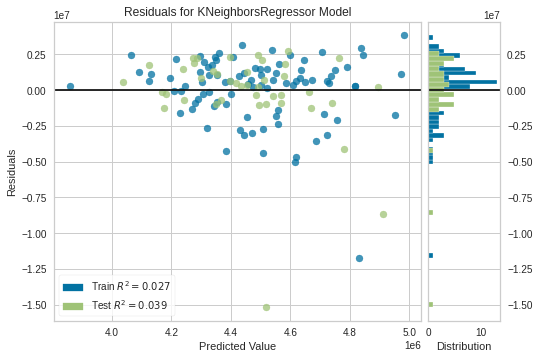

In [ ]:
plot_model(tuned_knn)

###Prediction error plot

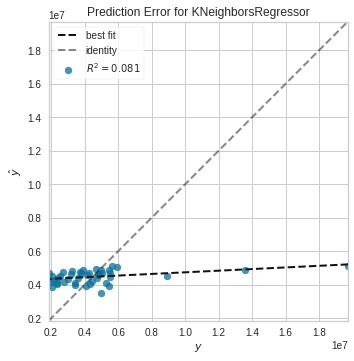

In [ ]:
plot_model(tuned_knn, plot = 'error')

###feature importance plot

In [ ]:
predict_model(tuned_knn);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,1680993.375,9.299996e+12,3049589.5,0.0389,0.477,0.4039


In [ ]:
final = finalize_model(tuned_knn)

In [ ]:
final

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                    weights='uniform')

In [ ]:
saved_model=save_model(final,"Final_model")

Transformation Pipeline and Model Successfully Saved


##Predict on Unseen Data

In [ ]:
data_unseen_for_testing=pd.read_csv("/content/test.csv")

In [ ]:
data_unseen_for_testing[["day", "month", "year"]] = data_unseen_for_testing["Open Date"].str.split("/", expand = True)
print("\nNew DataFrame:")
print(data_unseen_for_testing)


New DataFrame:
          Id   Open Date            City  City Group  ... P37  day  month  year
0          0  01/22/2011           Niğde       Other  ...   0   01     22  2011
1          1  03/18/2011           Konya       Other  ...   0   03     18  2011
2          2  10/30/2013          Ankara  Big Cities  ...   0   10     30  2013
3          3  05/06/2013         Kocaeli       Other  ...   0   05     06  2013
4          4  07/31/2013  Afyonkarahisar       Other  ...   0   07     31  2013
...      ...         ...             ...         ...  ...  ..  ...    ...   ...
99995  99995  01/05/2000         Antalya       Other  ...   0   01     05  2000
99996  99996  07/18/2011           Niğde       Other  ...   0   07     18  2011
99997  99997  12/29/2012        İstanbul  Big Cities  ...   2   12     29  2012
99998  99998  10/12/2013        İstanbul  Big Cities  ...   0   10     12  2013
99999  99999  10/05/2010        İstanbul  Big Cities  ...   0   10     05  2010

[100000 rows x 45 colum

In [ ]:
unseen_predictions_new = predict_model(estimator=final, data=data_unseen_for_testing)#by using loaded model pickle file
unseen_predictions_new

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,day,month,year,Label
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,01,22,2011,4062820.75
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,03,18,2011,4792066.00
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,10,30,2013,4206922.50
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,05,06,2013,4547056.50
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,07,31,2013,4470506.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,01,05,2000,4583024.50
99996,99996,07/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0,07,18,2011,3496813.75
99997,99997,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2,12,29,2012,4898059.00
99998,99998,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0,10,12,2013,4426803.00
